<a href="https://colab.research.google.com/github/Harshabobbiti626/Machine-Learning-Techniques/blob/main/Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Using SK-learn#

A decision tree is a machine learning algorithm that can help you figure out the best choices for an outcome, based on what you know about the inputs and the consequences of those choices.The supervised learning methods group includes a decision-making algorithm that uses output parameters that are categorized and continuous.

**The Decision Tree Algorithm :**
- To divide the data based on target variables, choose the best feature employing Attribute Selection Measures (ASM).
- Then it will divide the dataset into smaller sub-datasets and designate that feature as a decision node for that branch.
- Once one of the conditions matches, the procedure is repeated recursively for every child node to begin creating the tree.
- The identical property value applies to each of the tuples.
    - There aren't any more qualities left.
    - There aren't any more occurrences.

In [2]:
# Importing libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics  
import seaborn as sns  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn import tree  

In [3]:
  
# Loading the dataset  
iris = load_iris()  
  
#converting the data to a pandas dataframe  
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)  
  
#creating a separate column for the target variable of iris dataset   
data['Species'] = iris.target  

In [4]:
#replacing the categories of target variable with the actual names of the species  
target = np.unique(iris.target)  
target_n = np.unique(iris.target_names)  
target_dict = dict(zip(target, target_n))  
data['Species'] = data['Species'].replace(target_dict)    

In [5]:
  
# Separating the independent dependent variables of the dataset  
x = data.drop(columns = "Species")  
y = data["Species"]  
names_features = x.columns  
target_labels = y.unique()  

In [6]:
# Splitting the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)  

In [7]:
# Importing the Decision Tree classifier class from sklearn  
from sklearn.tree import DecisionTreeClassifier  
  
# Creating an instance of the classifier class  
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)  
  
# Fitting the training dataset to the model  
dtc.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=3, random_state=93)

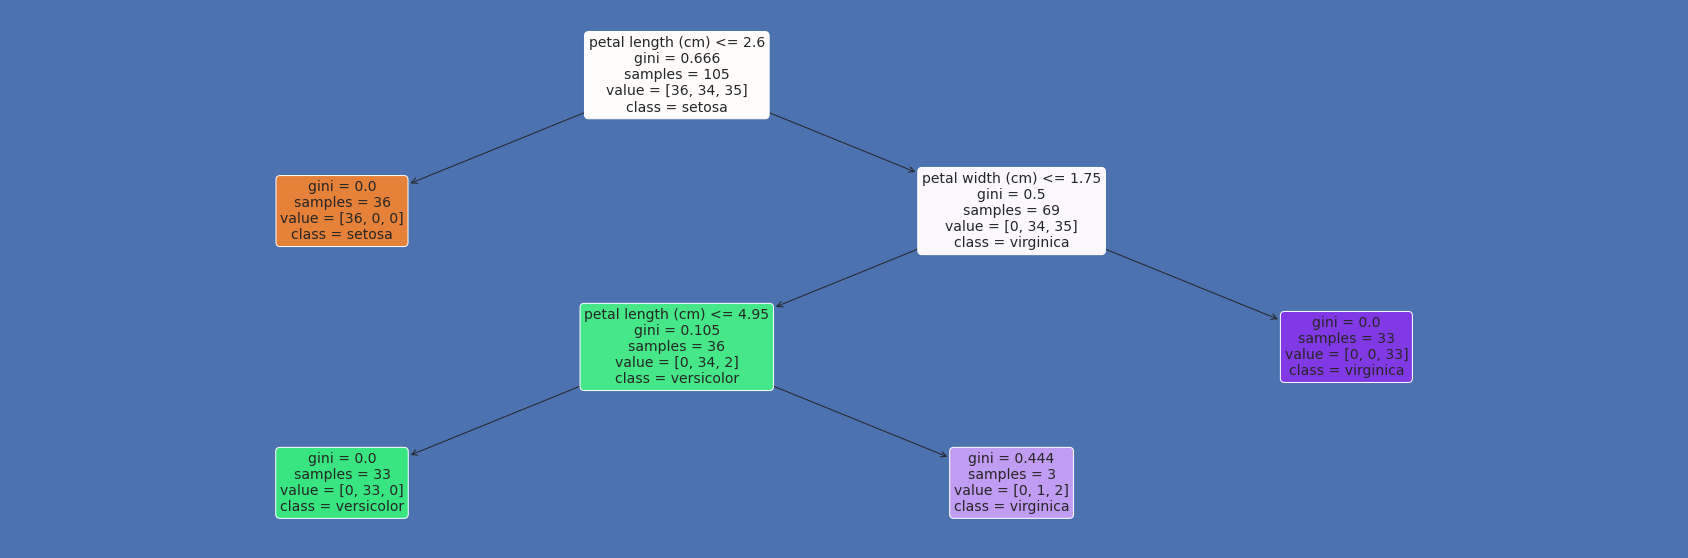

In [9]:
# Plotting the Decision Tree  
plt.figure(figsize = (30, 10), facecolor = 'b')  
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)  
plt.show()  
y_pred = dtc.predict(x_test)   

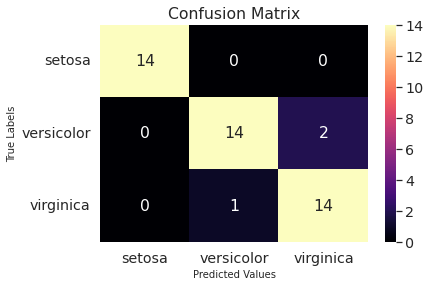

<Figure size 720x504 with 0 Axes>

In [14]:
# Finding the confusion matrix  
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix)  
axis = plt.axes()  
sns.set(font_scale = 1.3)  
plt.figure(figsize = (10,7)) 
# Plotting heatmap  
sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")  
axis.set_title('Confusion Matrix')  
axis.set_xlabel("Predicted Values", fontsize = 10)  
axis.set_xticklabels([''] + target_labels)  
axis.set_ylabel( "True Labels", fontsize = 10)  
axis.set_yticklabels(list(target_labels), rotation = 0)  
plt.show()